TEST

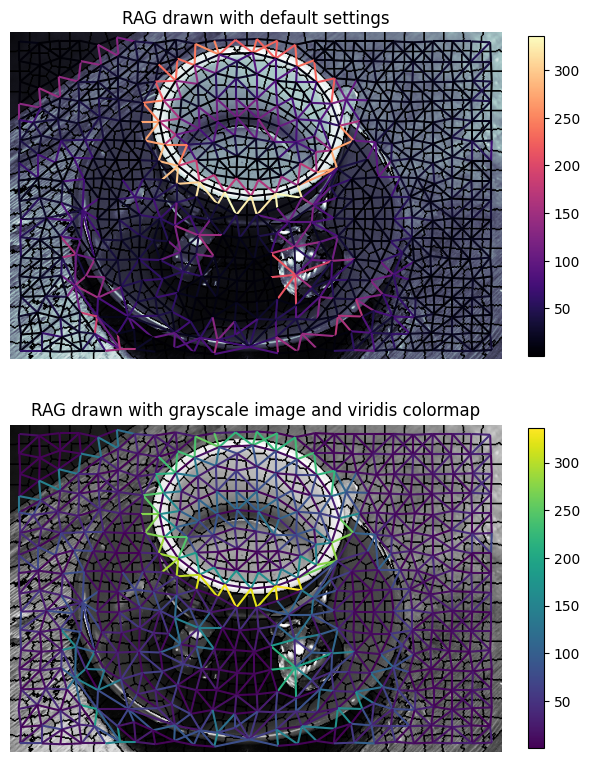

In [1]:
from skimage import data, segmentation
from skimage import graph
from matplotlib import pyplot as plt


img = data.coffee()
labels = segmentation.slic(img, compactness=30, n_segments=400, start_label=1)
g = graph.rag_mean_color(img, labels)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].set_title('RAG drawn with default settings')
lc = graph.show_rag(labels, g, img, ax=ax[0])
# specify the fraction of the plot area that will be used to draw the colorbar
fig.colorbar(lc, fraction=0.03, ax=ax[0])

ax[1].set_title('RAG drawn with grayscale image and viridis colormap')
lc = graph.show_rag(labels, g, img,
                    img_cmap='gray', edge_cmap='viridis', ax=ax[1])
fig.colorbar(lc, fraction=0.03, ax=ax[1])

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

In [2]:
from transformers import AutoModelForCausalLM, OPTForCausalLM, AutoTokenizer
from peft import PeftConfig

model_id = "facebook/opt-350m"
adapter_model_id = "ybelkada/opt-350m-lora"
tokenizer = AutoTokenizer.from_pretrained(model_id)
text = "Hello"
inputs = tokenizer(text, return_tensors="pt")

model = AutoModelForCausalLM.from_pretrained(model_id)
peft_config = PeftConfig.from_pretrained(adapter_model_id)

# to initiate with random weights
peft_config.init_lora_weights = False

model.add_adapter(peft_config)
model.enable_adapters()
output = model.generate(**inputs, max_length=20)

In [3]:
output

tensor([[    2, 31414,   202,   202,   202,   202,   202,   202,   202,   202,
           202,   202,   202,   202,   202,   202,   202,   202,   202,   202]])